In [1]:
import pandas as pd
import analysis_utility
import text_scene_detection_utility
%matplotlib inline

### Font-Color-Test on FB Data

In [2]:
train_path = r'own_dataset_font_color.csv'
train_df = pd.read_csv(train_path, index_col=0)
train_df.head(1)

,path,file_name,font_color,dataset
0,data\data_self_creation\font_color\black_baclg...,image_1060.jpg,white,black_baclground


#### get a random sample

train_df = train_df.sample(n=10, random_state=11)

In [3]:
train_df.head(5)

,path,file_name,font_color,dataset
0,data\data_self_creation\font_color\black_baclg...,image_1060.jpg,white,black_baclground
1,data\data_self_creation\font_color\black_baclg...,image_1086.jpg,white,black_baclground
2,data\data_self_creation\font_color\black_baclg...,image_1089.jpg,white,black_baclground
3,data\data_self_creation\font_color\black_baclg...,image_11.jpg,white,black_baclground
4,data\data_self_creation\font_color\black_baclg...,image_1143.png,white,black_baclground


#### perform OCR on df

In [4]:
df_result = analysis_utility.ocr_on_df(df=train_df, ds_name='font_color', path='dummy', img_format='dummy')

149

In [5]:
df_result

,ds_name,_id,confidence,orig_text,pred_text,font_color,all_mean_edge_colors,font_color_orig
0,black_baclground,123,91.978241,dummy,here’s 10.0 onother day of outward smiles and ...,white,15.258802,white
1,black_baclground,123,77.629913,dummy,ts going to be called space force and t's ath ...,white,9.007943,white
2,black_baclground,123,34.208305,dummy,pndwige it you tike mini-nae insiche vou mewes...,white,106.599830,white
3,black_baclground,123,48.948475,dummy,probably the first man to do 10.0 year challen...,white,26.624980,white
4,black_baclground,123,87.277405,dummy,"drunk al tove, tertink, just drunk",white,2.048961,white
...,...,...,...,...,...,...,...,...
145,white_background,123,95.584862,dummy,10.0 years challenge is jit af ae 1955.0 wow s...,black,249.650840,black
146,white_background,123,96.030602,dummy,me realising marvel has released the ‘avengers...,black,212.504784,black
147,white_background,123,25.974899,dummy,10.0 year challenge emotional edition ee,black,219.348521,black
148,white_background,123,96.434540,dummy,fornite died in 10.0 months but minecraft neve...,white,186.880148,black


In [6]:
df_result.to_csv('font_color_result.csv')

In [7]:
df_result

,ds_name,_id,confidence,orig_text,pred_text,font_color,all_mean_edge_colors,font_color_orig
0,black_baclground,123,91.978241,dummy,here’s 10.0 onother day of outward smiles and ...,white,15.258802,white
1,black_baclground,123,77.629913,dummy,ts going to be called space force and t's ath ...,white,9.007943,white
2,black_baclground,123,34.208305,dummy,pndwige it you tike mini-nae insiche vou mewes...,white,106.599830,white
3,black_baclground,123,48.948475,dummy,probably the first man to do 10.0 year challen...,white,26.624980,white
4,black_baclground,123,87.277405,dummy,"drunk al tove, tertink, just drunk",white,2.048961,white
...,...,...,...,...,...,...,...,...
145,white_background,123,95.584862,dummy,10.0 years challenge is jit af ae 1955.0 wow s...,black,249.650840,black
146,white_background,123,96.030602,dummy,me realising marvel has released the ‘avengers...,black,212.504784,black
147,white_background,123,25.974899,dummy,10.0 year challenge emotional edition ee,black,219.348521,black
148,white_background,123,96.434540,dummy,fornite died in 10.0 months but minecraft neve...,white,186.880148,black


In [8]:
df_result.font_color.value_counts()

white    107
black     43
Name: font_color, dtype: int64

In [9]:
df_result[df_result['font_color']=='black'].all_mean_edge_colors.mean()

241.46214326843818

In [10]:
df_result[df_result['font_color']=='white'].all_mean_edge_colors.mean()

54.728740067872714

#### add KPIs on df

In [11]:
df_result = analysis_utility.add_columns_on_df(df_result, ['cos_similarity'])

In [12]:
df_result.confidence.mean()

65.77600034666669

In [13]:
df_result.cos_similarity.mean()

0.0

In [14]:
df_result[['cos_similarity', 'confidence']].sort_values(by='cos_similarity', ascending=False)

,cos_similarity,confidence
0,0.0,91.978241
94,0.0,33.365334
96,0.0,35.860497
97,0.0,22.110779
98,0.0,0.000000
...,...,...
50,0.0,17.164902
51,0.0,73.524536
52,0.0,0.000000
53,0.0,95.517586


<AxesSubplot:>

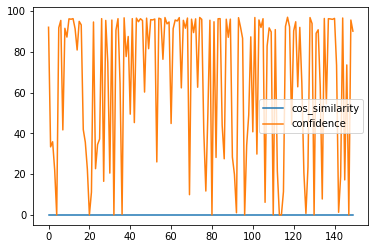

In [15]:
df_result[['cos_similarity', 'confidence']].sort_values(by='cos_similarity', ascending=False).reset_index(drop=True).plot(kind='line')

In [16]:
df_result.sort_values(by='cos_similarity')

,ds_name,_id,confidence,orig_text,pred_text,font_color,all_mean_edge_colors,font_color_orig,cos_similarity
0,black_baclground,123,91.978241,dummy,here’s 10.0 onother day of outward smiles and ...,white,15.258802,white,0.0
96,mixed_background,123,35.860497,dummy,im triggered ee a,white,35.119886,white,0.0
97,mixed_background,123,22.110779,dummy,tt baby: (ho in: onimy: we want lss gradle de ...,white,118.963965,white,0.0
98,mixed_background,123,0.000000,dummy,what: the fuuuu a shower i ote iia thefucking ...,white,178.626501,white,0.0
99,mixed_background,123,91.737244,dummy,vanlt brake our weis hee break your face memec...,white,174.012566,white,0.0
...,...,...,...,...,...,...,...,...,...
51,mixed_background,123,73.524536,dummy,drink water you may. not meme gce com,white,108.442533,white,0.0
52,mixed_background,123,0.000000,dummy,poo poa a a fof a fg,white,34.632459,white,0.0
53,mixed_background,123,95.517586,dummy,aaa awesom,white,89.208973,white,0.0
55,mixed_background,123,62.980122,dummy,what if i c1) you you don if have to post your...,white,96.919606,white,0.0


In [17]:
from sklearn.metrics import classification_report

In [51]:
local_df = df_result
print(local_df.shape)
pd.DataFrame(classification_report(local_df.font_color_orig.values, local_df.font_color.values, output_dict=True)) # true, pred

(150, 9)


,black,white,accuracy,macro avg,weighted avg
precision,1.000000,0.934579,0.953333,0.967290,0.956386
recall,0.860000,1.000000,0.953333,0.930000,0.953333
f1-score,0.924731,0.966184,0.953333,0.945457,0.952366
support,50.000000,100.000000,0.953333,150.000000,150.000000


In [55]:
local_df = df_result[df_result.ds_name=='black_baclground']
print(local_df.shape)
print('max', local_df.all_mean_edge_colors.max())
print('min', local_df.all_mean_edge_colors.min())
print('mean', local_df.all_mean_edge_colors.mean())
pd.DataFrame(classification_report(local_df.font_color_orig.values, local_df.font_color.values, output_dict=True)) # true, pred

(50, 9)
max 111.59687557858305
min 0.13809916417507903
mean 15.474010765903113


,white,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0
support,50.0,1.0,50.0,50.0


In [56]:
local_df = df_result[df_result.ds_name=='mixed_background']
print(local_df.shape)
print('max', local_df.all_mean_edge_colors.max())
print('min', local_df.all_mean_edge_colors.min())
print('mean', local_df.all_mean_edge_colors.mean())
pd.DataFrame(classification_report(local_df.font_color_orig.values, local_df.font_color.values, output_dict=True)) # true, pred

(50, 9)
max 178.62650075303938
min 2.6956925263952827
mean 75.99524657720967


,white,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0
support,50.0,1.0,50.0,50.0


In [57]:
local_df = df_result[df_result.ds_name=='white_background']
print(local_df.shape)
print('max', local_df.all_mean_edge_colors.max())
print('min', local_df.all_mean_edge_colors.min())
print('mean', local_df.all_mean_edge_colors.mean())
pd.DataFrame(classification_report(local_df.font_color_orig.values, local_df.font_color.values, output_dict=True)) # true, pred

(50, 9)
max 254.8843182812345
min 159.97633042544717
mean 233.30768961299162


C:\Users\Niklas\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niklas\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niklas\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,black,white,accuracy,macro avg,weighted avg
precision,1.000000,0.0,0.86,0.500000,1.000000
recall,0.860000,0.0,0.86,0.430000,0.860000
f1-score,0.924731,0.0,0.86,0.462366,0.924731
support,50.000000,0.0,0.86,50.000000,50.000000
